In [15]:
## Importing the necessary libraries and loading the songs train data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
songs = pd.read_csv('../data/spotify_songs_train.csv')

In [16]:
songs.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

<Figure size 1000x600 with 0 Axes>

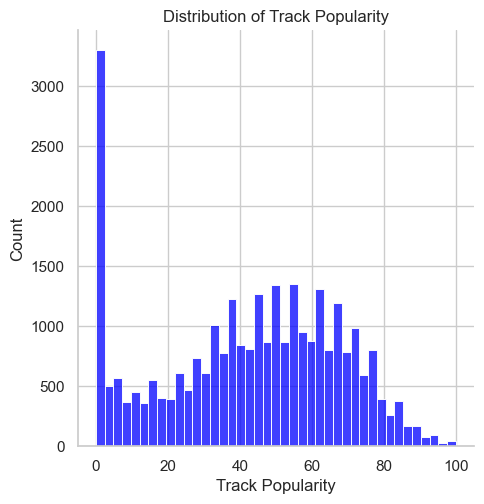

In [17]:
## Plotting the distribution of the target variable i.e track_popularity
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(songs['track_popularity'], kde=False, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Count')
plt.show()

There are a lot of songs with popularity 0, we can drop these columns but let's keep them intact to teach our model that the score can be 0 as well, means these songs got not traction at all

In [ ]:
# ## Dropping the rows with popularity equal to 0
# songs = songs[songs['track_popularity'] != 0]

# ## Plotting the distribution of the target variable i.e track_popularity
# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))
# sns.displot(songs['track_popularity'], kde=False, color='blue')
# plt.title('Distribution of Track Popularity')
# plt.xlabel('Track Popularity')
# plt.ylabel('Count')
# plt.show()

In [18]:
## Checking for missing values
songs.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [19]:
## Dropping the missing values
songs = songs.dropna()
## Checking the shape of the updated data
songs.shape

(29545, 23)

In [21]:
## Now we observed that tracks are being repeated in the dataset, as on track can be part of multiple playlists, so we wiil only keep the row with the highest popularity for each track
songs = songs.sort_values('track_popularity', ascending=False).drop_duplicates('track_id').sort_index()
songs.shape

(25827, 23)